In [ ]:
"""
# Command Line Instructions
conda activate GFANC
cd ..
chmod +x train.sh # Modify file permissions if it cannot be executed

# Before running, modify the folder name in path.sh

./train.sh 1 models # Preprocess the dataset
./train.sh 2 models # Train the network

# Continue training on an already trained model; weights.pt is the latest model
./train.sh 2 models weights.pt

#./valid.sh 1 models weights # Validate

# Test the model
./test.sh 1 models weights # Before testing, move weights.pt to the folder Testing_output/models/weights.pt

# View training process
conda activate GFANC
tensorboard --logdir=Training_output/models --bind_all # If port 6006 is occupied, use any available port
tensorboard --logdir=Training_output/models # Only on port 6006
http://10.97.25.117:6006 # Enter the URL

# Clear the trash bin
rm -rf ~/.local/share/Trash/*

"""

In [1]:
# test error rate of data processed by diffusion model
import numpy as np
import matplotlib.pyplot as plt
import heartpy as hp
import os
import random
# pip install heartpy

Sub7_Channel0_Segment3104.wav
bpm: 73.697270
ibi: 814.141414
sdnn: 47.934588
sdsd: 26.417002
rmssd: 44.109984
pnn20: 0.628571
pnn50: 0.257143
hr_mad: 36.363636
sd1: 31.190469
sd2: 59.600061
s: 5840.075749
sd1/sd2: 0.523329
breathingrate: 0.273121
Erro rate:  0.0


<Figure size 1200x400 with 0 Axes>

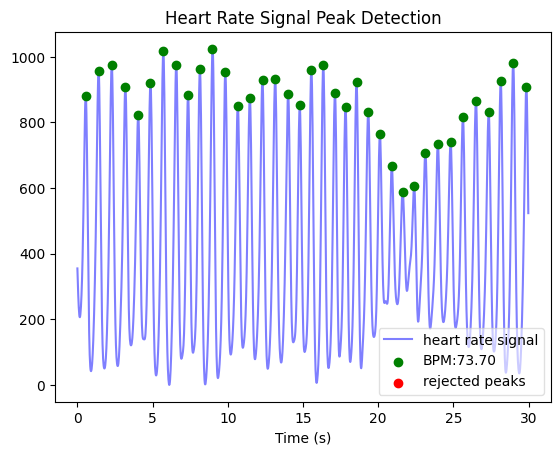

In [11]:
# ramdom select file from testing_dataset to show the performance

import librosa

foldername = '../1.Making_Dataset_Code/Testing_Dataset/clean'

# Get a list of files in the folder
files = os.listdir(foldername)

# Randomly select a file from the folder
filename = random.choice(files)
print(filename)
filepath = os.path.join(foldername, filename)

# Load the selected file
signal, sr = librosa.load(filepath, sr=55)

def BandPassFilter(data):
    data = np.array(data)
    filtered = hp.filter_signal(data, cutoff = [0.7, 3.5], sample_rate = 55, order = 3, filtertype='bandpass')
    scaled = hp.preprocessing.scale_data(filtered)
    return scaled

processed_data = BandPassFilter(signal)

wd, m = hp.process(processed_data, sample_rate=55, report_time = False)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

print("Erro rate: ", ((len(wd['removed_beats']))/(len(wd['peaklist']))))

bpm: 73.442136
ibi: 816.969697
sdnn: 76.411721
sdsd: 56.682407
rmssd: 90.909091
pnn20: 0.727273
pnn50: 0.636364
hr_mad: 18.181818
sd1: 63.759674
sd2: 80.092836
s: 16043.149675
sd1/sd2: 0.796072
breathingrate: 0.244938
Erro rate:  0.42105263157894735


<Figure size 1200x400 with 0 Axes>

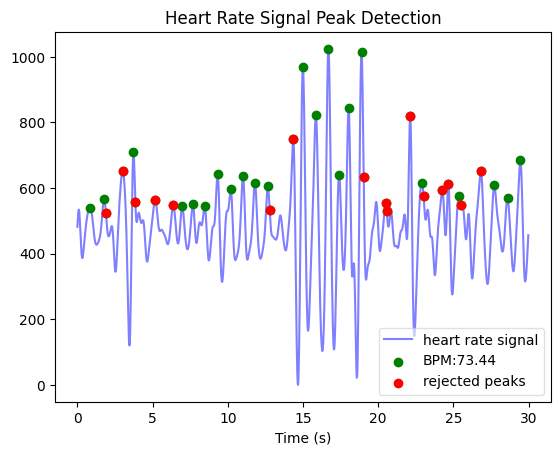

In [12]:
foldername = '../1.Making_Dataset_Code/Testing_Dataset/noisy'
filepath = os.path.join(foldername, filename)
signal, sr = librosa.load(filepath, sr=55)

def BandPassFilter(data):
    data = np.array(data)
    filtered = hp.filter_signal(data, cutoff = [0.7, 3.5], sample_rate = 55, order = 3, filtertype='bandpass')
    scaled = hp.preprocessing.scale_data(filtered)
    return scaled

processed_data = BandPassFilter(signal)

wd, m = hp.process(processed_data, sample_rate=55, report_time = False)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

print("Erro rate: ", ((len(wd['removed_beats']))/(len(wd['peaklist']))))

bpm: 74.691358
ibi: 803.305785
sdnn: 70.268997
sdsd: 49.600879
rmssd: 75.036648
pnn20: 0.612903
pnn50: 0.516129
hr_mad: 36.363636
sd1: 52.642359
sd2: 73.601780
s: 12172.324955
sd1/sd2: 0.715232
breathingrate: 0.226458
Erro rate:  0.027777777777777776


<Figure size 1200x400 with 0 Axes>

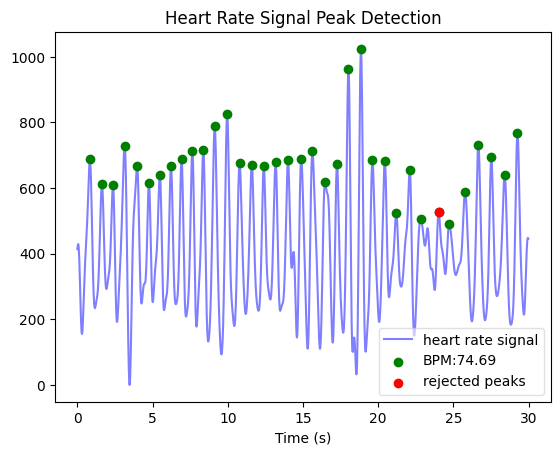

In [13]:
foldername = 'Testing_output/Test_Result/models/modelweights/test/voicebank_Noisy_Test/'
filepath = os.path.join(foldername, filename)
signal, sr = librosa.load(filepath, sr=55)

def BandPassFilter(data):
    data = np.array(data)
    filtered = hp.filter_signal(data, cutoff = [0.7, 3.5], sample_rate = 55, order = 3, filtertype='bandpass')
    scaled = hp.preprocessing.scale_data(filtered)
    return scaled

processed_data = BandPassFilter(signal)

wd, m = hp.process(processed_data, sample_rate=55, report_time = False)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

print("Erro rate: ", ((len(wd['removed_beats']))/(len(wd['peaklist']))))

In [ ]:
# compute the averaged error rates in folders

import os
import librosa
import numpy as np
import heartpy as hp
import matplotlib.pyplot as plt

# Define the folder paths
folders = [
    '../1.Making_Dataset_Code/Testing_Dataset/clean',
    '../1.Making_Dataset_Code/Testing_Dataset/noisy',
    'Testing_output/Test_Result/models/modelweights/test/voicebank_Noisy_Test/'
]

# Define the function for bandpass filtering
def BandPassFilter(data):
    data = np.array(data)
    filtered = hp.filter_signal(data, cutoff=[0.7, 3.5], sample_rate=55, order=3, filtertype='bandpass')
    scaled = hp.preprocessing.scale_data(filtered)
    return scaled

# Define the function to calculate the error rate for a single file
def calculate_error_rate(filepath):
    signal, sr = librosa.load(filepath, sr=55)
    processed_data = BandPassFilter(signal)
    wd, m = hp.process(processed_data, sample_rate=55, report_time=False)
    error_rate = len(wd['removed_beats']) / len(wd['peaklist'])
    return error_rate

# Iterate through each folder and calculate the average error rate
for folder in folders:
    error_rates = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        if os.path.isfile(filepath):
            error_rate = calculate_error_rate(filepath)
            error_rates.append(error_rate)
    
    if error_rates:
        average_error_rate = sum(error_rates) / len(error_rates)
        print(f"Average error rate for {folder}: {average_error_rate}")
    else:
        print(f"No valid files found in {folder}")

"""
Average error rate for ../1.Making_Dataset_Code/Testing_Dataset/clean: 0.014085712335976993
Average error rate for ../1.Making_Dataset_Code/Testing_Dataset/noisy: 0.2046219205381244
Average error rate for Testing_output/Test_Result/models/modelweights/test/voicebank_Noisy_Test/: 0.059075008808143675
"""